In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("premium_dataset.csv")

In [3]:
df.head()

,id,age,income,city,visits_last_month,avg_session_time,is_premium,churn
0,1,34.0,52000.0,Dhaka,5,12.5,0,1
1,2,NaN,48000.0,Chittagong,3,10.1,1,0
2,3,27.0,61000.0,Sylhet,7,15.2,0,1
3,4,45.0,NaN,Rajshahi,2,8.0,0,0
4,5,22.0,150000.0,Dhaka,12,30.5,1,1


In [4]:
df.shape

(550, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 550 non-null    int64  
 1   age                542 non-null    float64
 2   income             515 non-null    float64
 3   city               550 non-null    object 
 4   visits_last_month  550 non-null    int64  
 5   avg_session_time   550 non-null    float64
 6   is_premium         550 non-null    int64  
 7   churn              550 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 34.5+ KB


In [6]:
df.describe()

,id,age,income,visits_last_month,avg_session_time,is_premium,churn
count,550.000000,542.000000,515.000000,550.000000,550.000000,550.000000,550.000000
mean,275.500000,39.354244,79699.029126,3.663636,10.902000,0.414545,0.567273
std,158.915596,12.050263,62845.300607,3.065993,7.675826,0.493092,0.495905
min,1.000000,19.000000,1000.000000,0.000000,1.200000,0.000000,0.000000
25%,138.250000,29.000000,35000.000000,1.000000,4.000000,0.000000,0.000000
50%,275.500000,37.000000,52000.000000,3.000000,8.000000,0.000000,1.000000
75%,412.750000,50.000000,110000.000000,6.000000,14.800000,1.000000,1.000000
max,550.000000,62.000000,500000.000000,12.000000,30.500000,1.000000,1.000000


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

id                    0
age                   8
income               35
city                  0
visits_last_month     0
avg_session_time      0
is_premium            0
churn                 0
dtype: int64

In [9]:
#visualisation
df.columns

Index(['id', 'age', 'income', 'city', 'visits_last_month', 'avg_session_time',
       'is_premium', 'churn'],
      dtype='object')

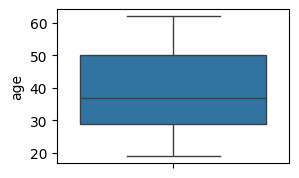

In [10]:
plt.figure(figsize=(3,2))
sns.boxplot(df['age'])
plt.show()

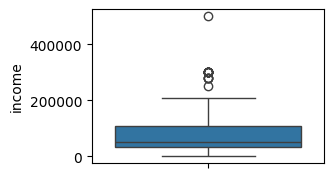

In [11]:
plt.figure(figsize=(3,2))
sns.boxplot(df['income'])
plt.show()

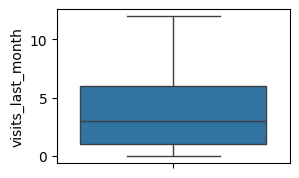

In [12]:
plt.figure(figsize=(3,2))
sns.boxplot(df['visits_last_month'])
plt.show()

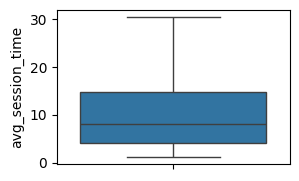

In [13]:
plt.figure(figsize=(3,2))
sns.boxplot(df['avg_session_time'])
plt.show()

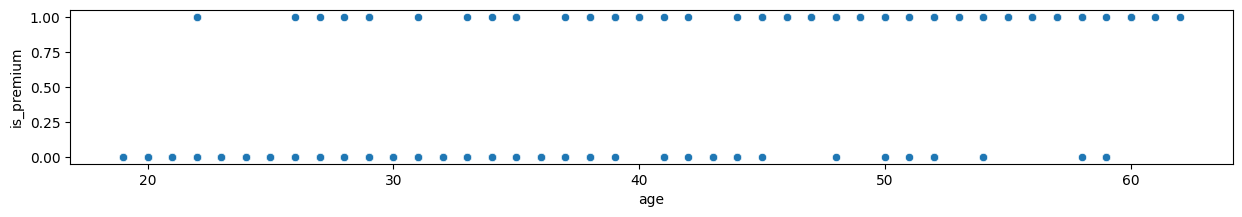

In [14]:
plt.figure(figsize=(15,2))
sns.scatterplot(x='age', y='is_premium', data=df)
plt.show()

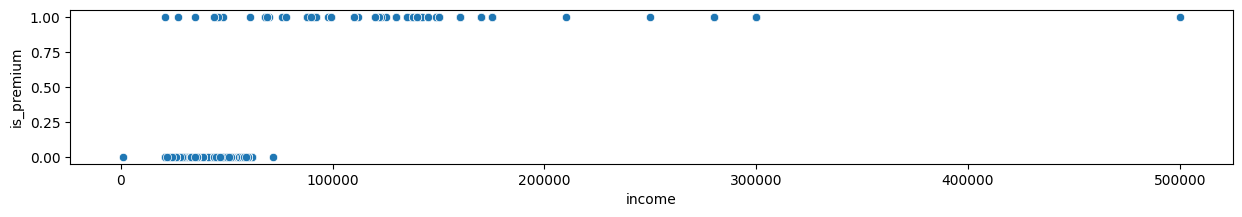

In [15]:
plt.figure(figsize=(15,2))
sns.scatterplot(x='income', y='is_premium', data=df)
plt.show()

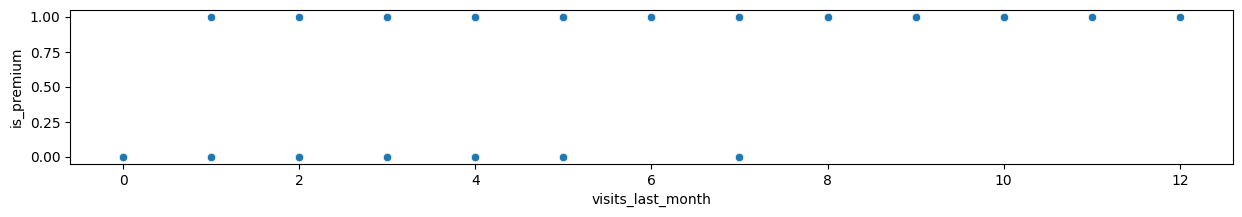

In [16]:
plt.figure(figsize=(15,2))
sns.scatterplot(x='visits_last_month', y='is_premium', data=df)
plt.show()

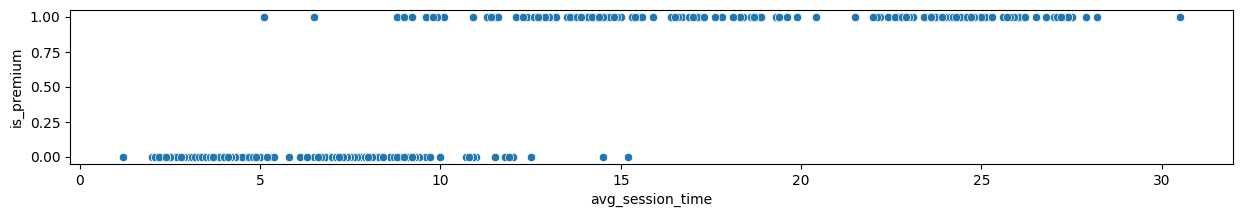

In [17]:
plt.figure(figsize=(15,2))
sns.scatterplot(x='avg_session_time', y='is_premium', data=df)
plt.show()

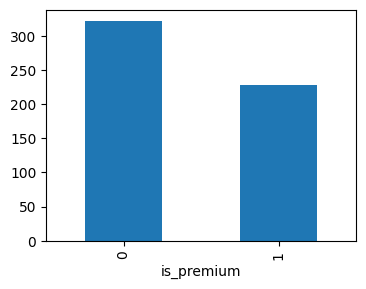

In [18]:
plt.figure(figsize=(4,3))
df['is_premium'].value_counts().plot(kind='bar')
plt.show()

In [19]:
#outlier removing using bosplot
def outlier(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    
    iqr = q3 - q1

    lower_wh = q1 - 1.5 * iqr
    upper_wh = q3 + 1.5 * iqr

    return df[(df[col] >= lower_wh) & (df[col] <= upper_wh)]

In [20]:
num_column = ['income']

In [21]:
df_clean = df.copy()

In [22]:
for col1 in num_column:
    df_clean = outlier(df_clean, col1)

In [23]:
df = df_clean.copy()

In [24]:
df.shape

(496, 8)

In [25]:
df.head()

,id,age,income,city,visits_last_month,avg_session_time,is_premium,churn
0,1,34.0,52000.0,Dhaka,5,12.5,0,1
1,2,NaN,48000.0,Chittagong,3,10.1,1,0
2,3,27.0,61000.0,Sylhet,7,15.2,0,1
4,5,22.0,150000.0,Dhaka,12,30.5,1,1
5,6,38.0,42000.0,Khulna,0,2.1,0,0


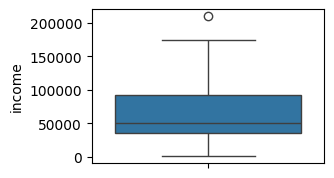

In [26]:
plt.figure(figsize=(3,2))
sns.boxplot(df['income'])
plt.show()

In [27]:
df.isna().sum()

id                   0
age                  8
income               0
city                 0
visits_last_month    0
avg_session_time     0
is_premium           0
churn                0
dtype: int64

In [28]:
df['age'] = df['age'].fillna(df['age'].mean())

In [29]:
# lavel encoding
le = LabelEncoder()

In [30]:
df['city'] = le.fit_transform(df[['city']])

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
df.head()

,id,age,income,city,visits_last_month,avg_session_time,is_premium,churn
0,1,34.000000,52000.0,3,5,12.5,0,1
1,2,38.313525,48000.0,2,3,10.1,1,0
2,3,27.000000,61000.0,6,7,15.2,0,1
4,5,22.000000,150000.0,3,12,30.5,1,1
5,6,38.000000,42000.0,4,0,2.1,0,0


<Axes: xlabel='city'>

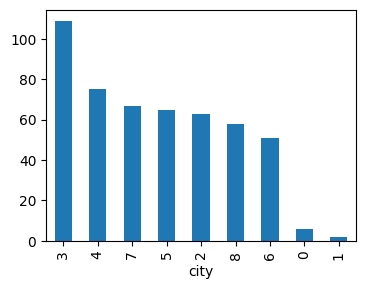

In [32]:
plt.figure(figsize=(4,3))
df['city'].value_counts().plot(kind='bar')

In [33]:
df = df.drop(['churn'], axis=1)

In [34]:
df.head()

,id,age,income,city,visits_last_month,avg_session_time,is_premium
0,1,34.000000,52000.0,3,5,12.5,0
1,2,38.313525,48000.0,2,3,10.1,1
2,3,27.000000,61000.0,6,7,15.2,0
4,5,22.000000,150000.0,3,12,30.5,1
5,6,38.000000,42000.0,4,0,2.1,0


In [35]:
df.columns

Index(['id', 'age', 'income', 'city', 'visits_last_month', 'avg_session_time',
       'is_premium'],
      dtype='object')

In [36]:
#feature/ target split
x = df[['id', 'age', 'income', 'city', 'visits_last_month', 'avg_session_time']]
y = df[['is_premium']]

In [37]:
#train test split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [38]:
xtrain.head()

,id,age,income,city,visits_last_month,avg_session_time
64,65,44.0,52000.0,0,3,9.4
255,256,31.0,51000.0,3,2,7.1
435,436,24.0,26000.0,7,0,2.3
366,367,33.0,50000.0,5,2,7.2
248,249,29.0,36000.0,3,1,4.0


In [39]:
ytrain.head()

,is_premium
64,0
255,0
435,0
366,0
248,0


# KNN classification model applyng

In [40]:
#model implementation
knnc = KNeighborsClassifier()

In [41]:
knnc_model = knnc.fit(xtrain, ytrain)

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [42]:
knnc_model.score(xtrain, ytrain)

0.9797979797979798

In [43]:
knnc_model.score(xtest, ytest)

0.97

In [44]:
knnc_pred_y = knnc_model.predict(xtest)

In [45]:
#confusion metrics
cm_k = confusion_matrix(ytest, knnc_pred_y)
cm_k

array([[57,  0],
       [ 3, 40]])

<Axes: >

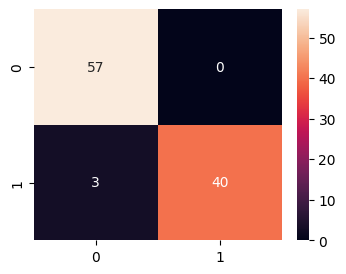

In [46]:
plt.figure(figsize=(4,3))
sns.heatmap(cm_k, annot=True)

In [47]:
# classification report
cl_k = classification_report(ytest, knnc_pred_y)
print(cl_k)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       1.00      0.93      0.96        43

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [48]:
#accuracy score
as_k = accuracy_score(ytest, knnc_pred_y)
as_k

0.97

# Applying logistic Regression

In [49]:
#import logistic regression
log = LogisticRegression()

In [50]:
log_model = log.fit(xtrain, ytrain)

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
log_model.score(xtrain, ytrain)

0.9722222222222222

In [52]:
log_model.score(xtest, ytest)

0.93

In [53]:
log_pred_y = log_model.predict(xtest)

In [54]:
#confusion metrics
cm_l = confusion_matrix(ytest, log_pred_y)
cm_l

array([[53,  4],
       [ 3, 40]])

<Axes: >

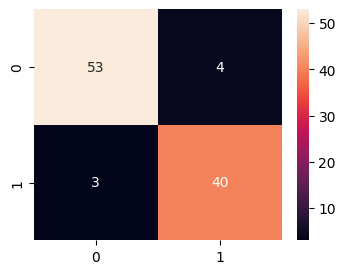

In [55]:
plt.figure(figsize=(4,3))
sns.heatmap(cm_l, annot=True)

In [56]:
#classfication report 
cl_l = classification_report(ytest, log_pred_y)
print(cl_l)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        57
           1       0.91      0.93      0.92        43

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [57]:
#accuracy score
as_l = accuracy_score(ytest, log_pred_y)
as_l

0.93

# KNN classification is better than Logistic regression